
1. does duplicate gameweeks values need to be removed or are they double gameweeksfor gameweeks less than 4. the form will be current gameweeks / 10 or how will it be calculated.
2. the largest sum of total points on average per position. per season or for all season.
3. 2B - how to find the highest form. is it the average or what


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from keras import Sequential, Input 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.metrics import Precision, Recall 

2025-10-21 23:01:52.754731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761087713.196933      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761087713.318890      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# the main dataset

df = pd.read_csv('/kaggle/input/pl-dataset/cleaned_merged_seasons.csv')  
df.head() # This shows you the first 5 rows of the table!

/tmp/ipykernel_13/760554143.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/pl-dataset/cleaned_merged_seasons.csv')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [3]:
df['position'].unique()
df[df['position'] == "GKP"]

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
68045,2021-22,Bernd Leno,GKP,Arsenal,0,0,0,0,0.0,1,...,2.0,0.0,0,-422,216,638,45,False,0,37
68072,2021-22,Nick Pope,GKP,Burnley,0,0,20,0,0.0,112,...,1.0,0.0,3,-235,10433,10668,53,False,1,37
68073,2021-22,Nick Pope,GKP,Burnley,0,1,26,0,0.0,112,...,1.0,0.0,5,-235,10433,10668,53,False,0,37
68076,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
68077,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68861,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68862,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68904,2021-22,David Raya Martin,GKP,Brentford,0,0,18,0,0.0,80,...,2.0,0.0,2,8656,16108,7452,43,False,0,37
68917,2021-22,Ellery Balcombe,GKP,Brentford,0,0,0,0,0.0,92,...,2.0,0.0,0,-3,0,3,40,False,0,37


In [4]:
# the list of teams in each year
temp_df = pd.read_csv('/kaggle/input/pl-dataset/master_team_list.csv')
temp_df.head() # This shows you the first 5 rows of the table!

,season,team,team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [6]:
df.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [7]:
df.isnull().sum()

season_x                 0
name                     0
position                 0
team_x               19852
assists                  0
bonus                    0
bps                      0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

<Axes: >

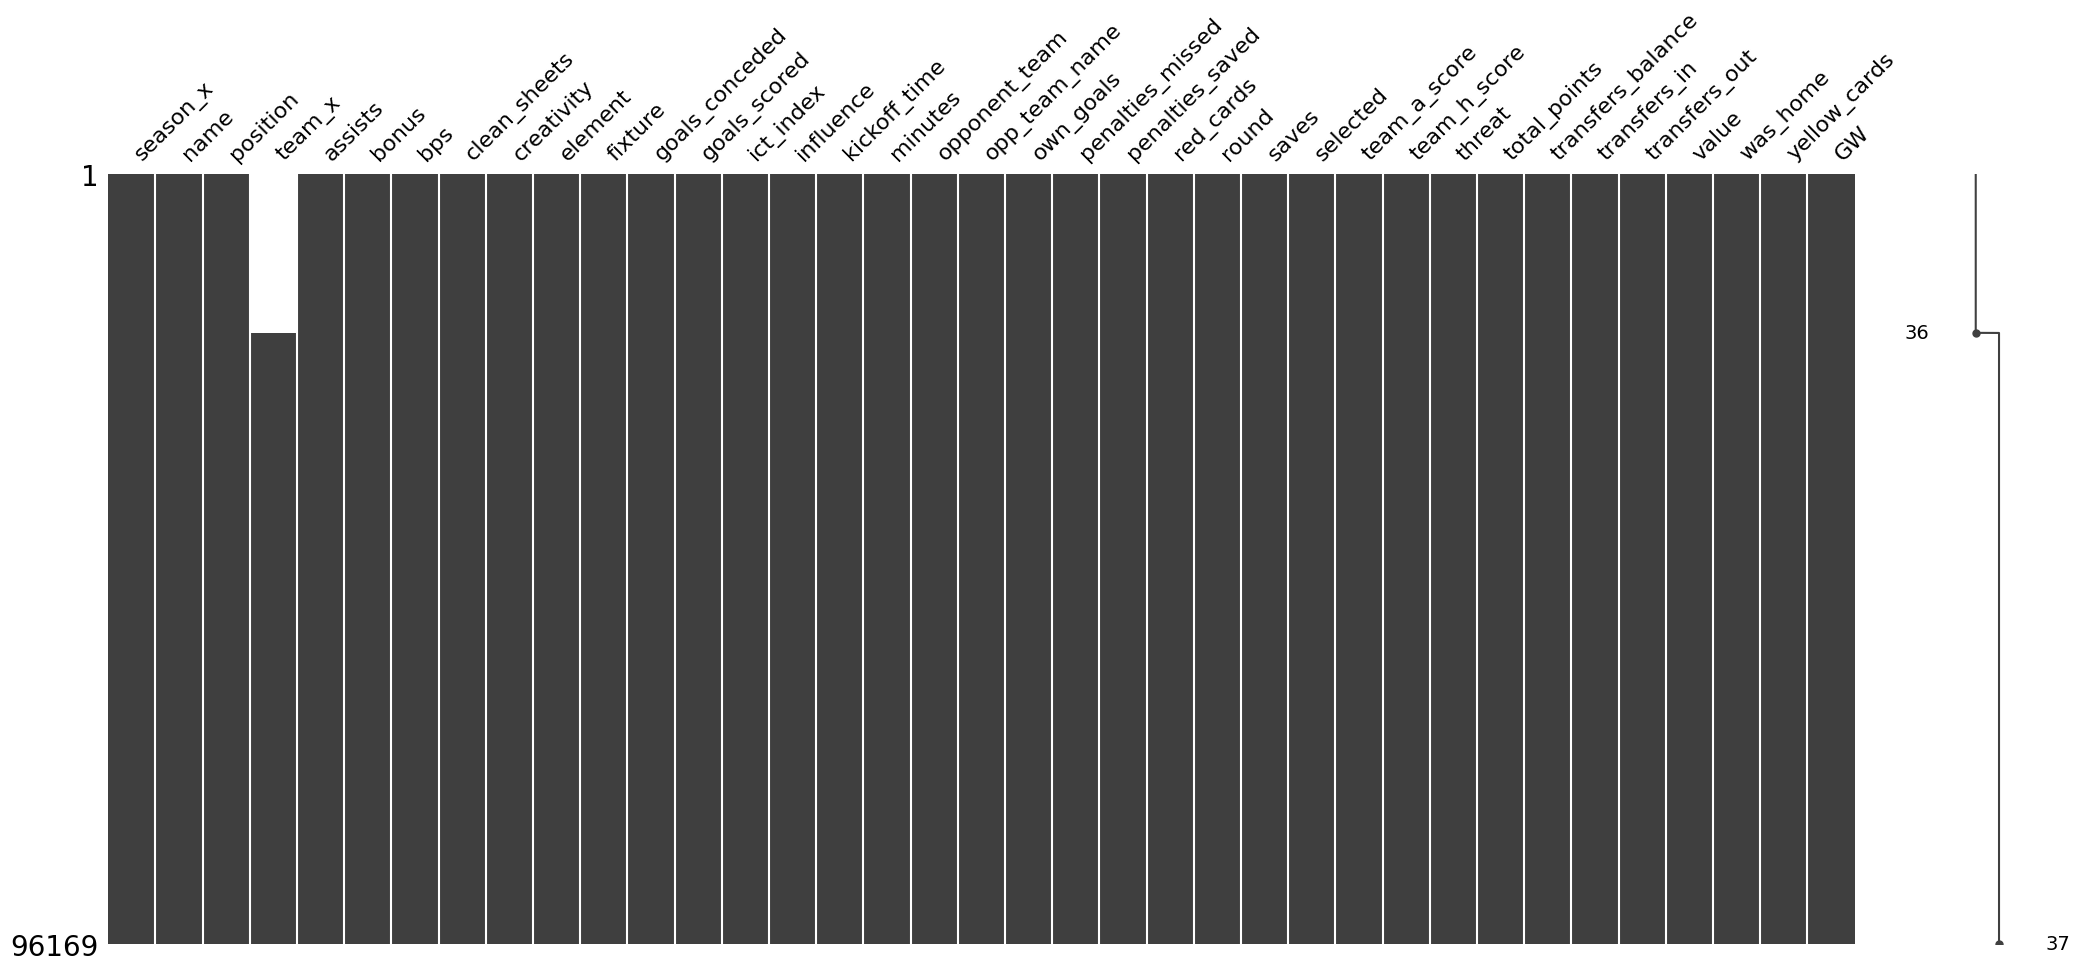

In [8]:
msno.matrix(df)

In [9]:
# listing the list of attributes in the dataset
df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

### Filling Null Values in team column

In [10]:
# Fill NaNs in "team_x" within each "name" group using nearest non-null values:
# - Forward fill (ffill) to use the previous value
# - Backward fill (bfill) for any remaining NaNs
df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_13/3244529142.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


<Axes: >

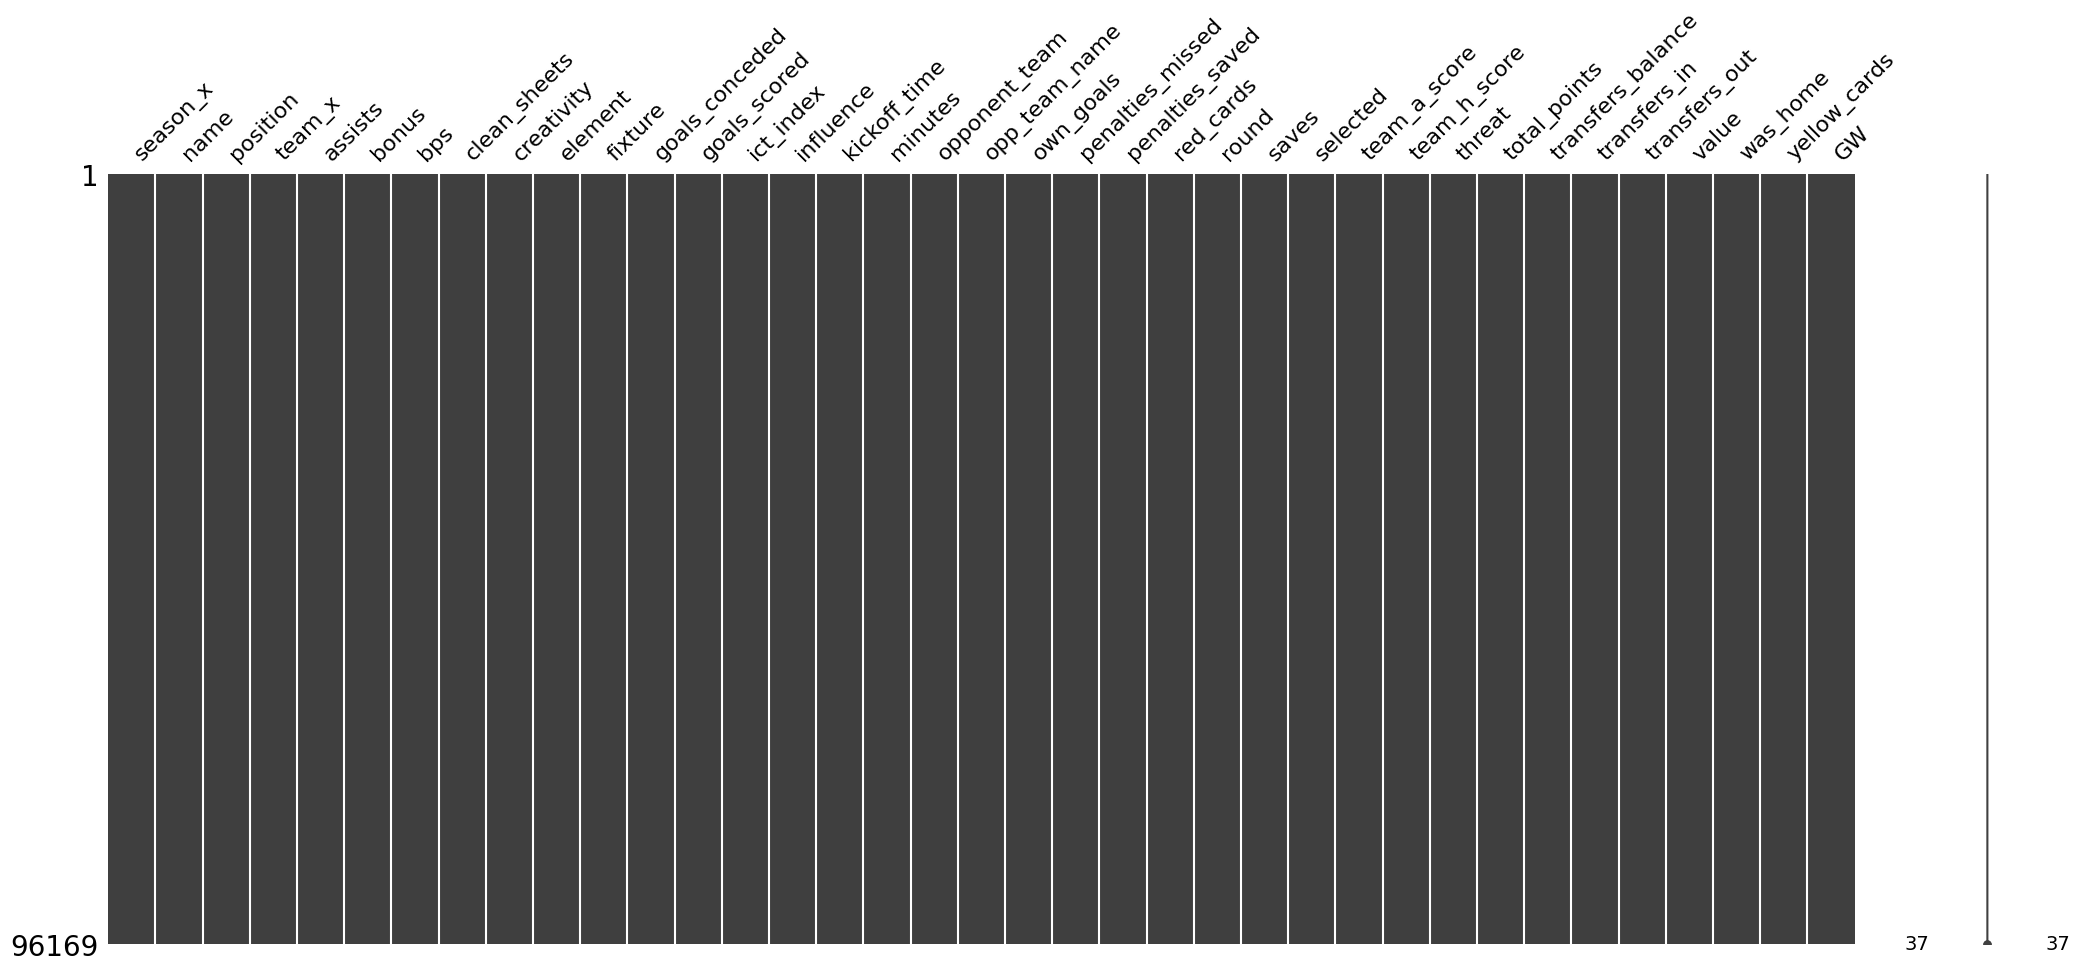

In [11]:
# checking if there is still nan values
msno.matrix(df)

### Chacking for Duplicates

In [12]:
# Check if entire rows are duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Show duplicate rows
duplicate_rows = df[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [13]:
# Check duplicates based on specific columns
duplicates = df.duplicated(subset=['name', 'season_x', 'GW', 'opponent_team', 'team_x'])
print(f"Duplicate players in same season: {duplicates.sum()}")

# Show these duplicates
duplicate_players = df[duplicates]
print(duplicate_players)

Duplicate players in same season: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [14]:
# finding duplicate cells

dupe_groups = (
    
    df.groupby(["name", "GW", "season_x"])
      .size()
      .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"] > 1]
print(dupe_groups)

                  name  GW season_x  count
41      Aaron Connolly  22  2021-22      2
46      Aaron Connolly  25  2021-22      2
54      Aaron Connolly  29  2021-22      2
61      Aaron Connolly  33  2021-22      2
161    Aaron Cresswell  19  2020-21      2
...                ...  ..      ...    ...
90212   Çaglar Söyüncü  36  2021-22      2
90215   Çaglar Söyüncü  37  2021-22      2
90235     Ørjan Nyland  19  2020-21      2
90242     Ørjan Nyland  26  2020-21      2
90251     Ørjan Nyland  35  2020-21      2

[5860 rows x 4 columns]


### These found duplicates tell that the player has played a postponed match during this game week leading to the found duplication.


### Create Form Column for Dataset

In [15]:
def calculate_form(df, window=4):
    """
    More explicit version with better handling of edge cases
    """
    # Sort by player, season, and gameweek
    df_sorted = df.sort_values(['name', 'season_x', 'GW']).copy()
    
    # Initialize form column
    df_sorted['form'] = 0.0
    
    # Group by player and season
    for (player, season), group in df_sorted.groupby(['name', 'season_x']):
        # Get the indices for this player-season combination
        indices = group.index
        
        # Calculate form for each gameweek
        for i, idx in enumerate(indices):
            # Get past 4 gameweeks (including current)
            start_idx = max(0, i - 3)  # Go back 3 more to get 4 total
            end_idx = i + 1
            
            # Calculate average of past 4 gameweeks
            past_points = group.iloc[start_idx:end_idx]['total_points']
            avg_points = past_points.mean()
            
            # Divide by 10
            df_sorted.loc[idx, 'form'] = avg_points / 10
    
    return df_sorted

# Apply the function
df = calculate_form(df)

<Axes: >

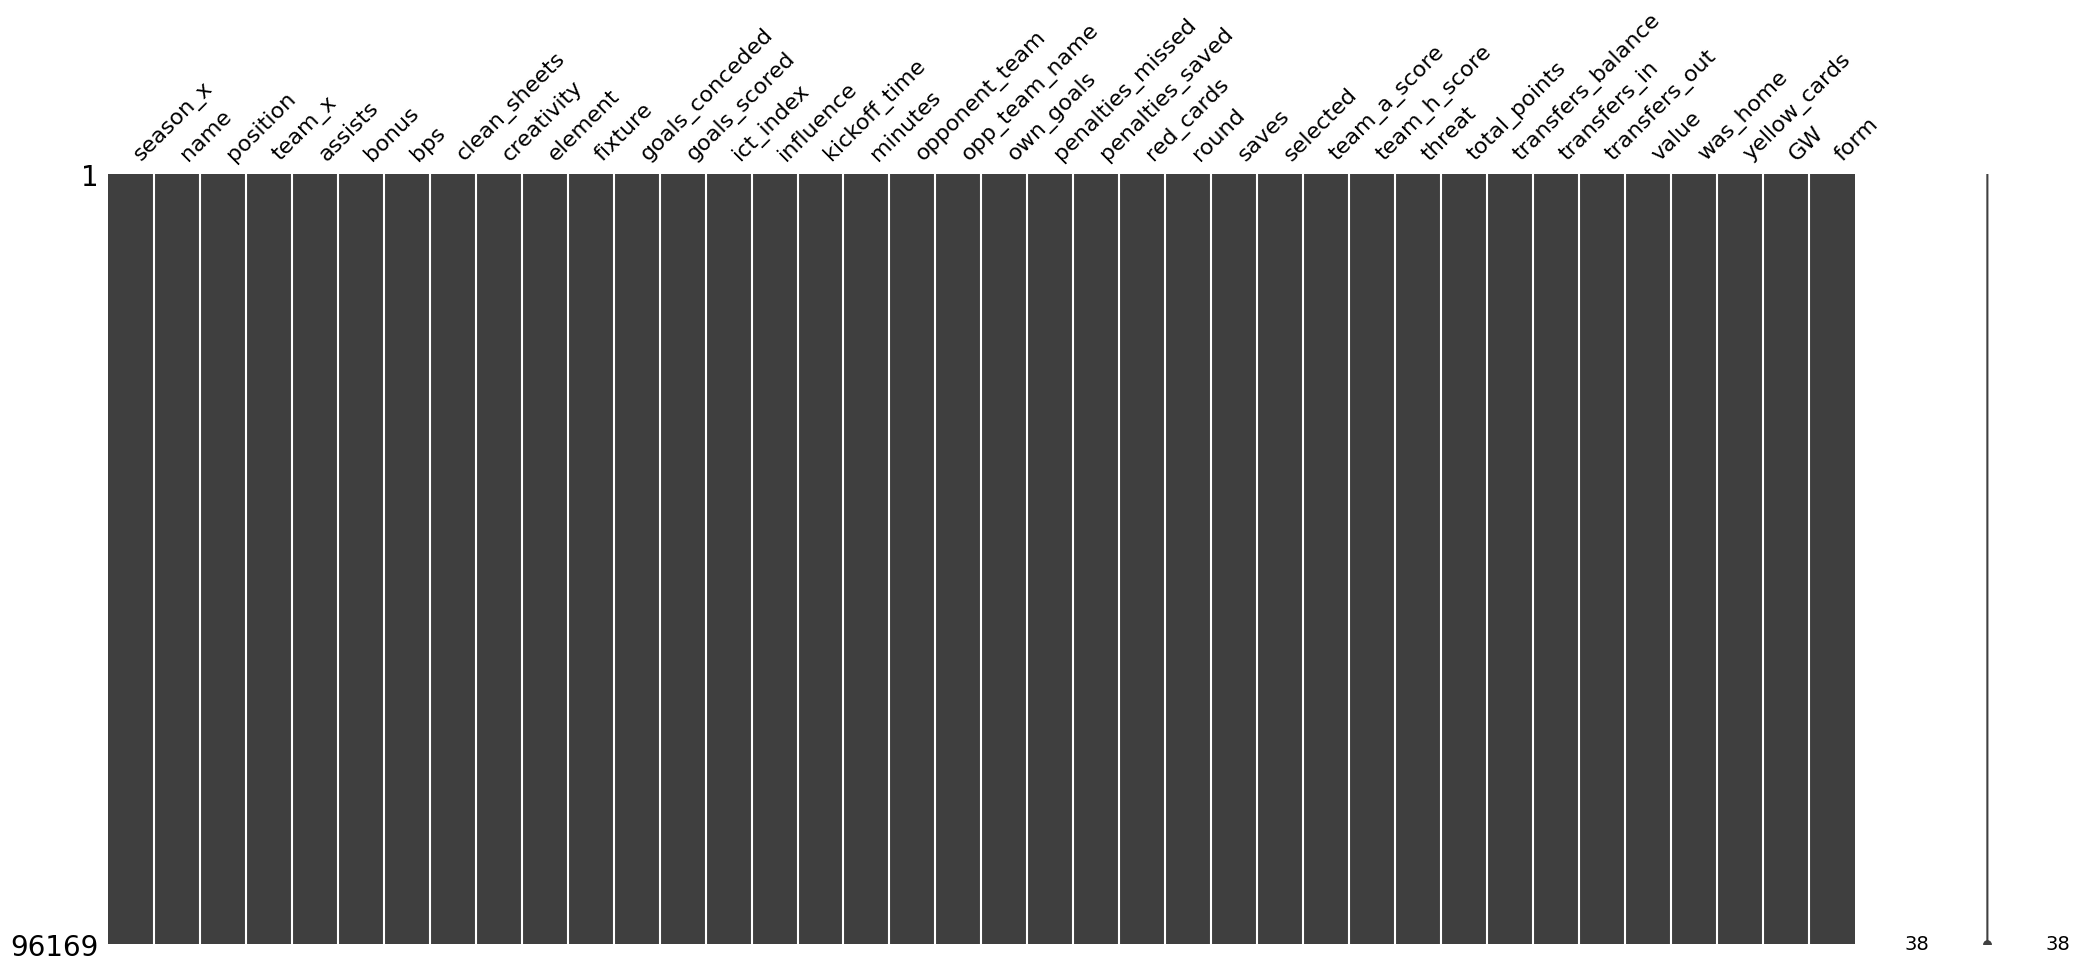

In [16]:
msno.matrix(df)

In [17]:
df[['name','team_x','GW','total_points','form']].head(50)

,name,team_x,GW,total_points,form
19852,Aaron Connolly,Brighton,1,1,0.100000
20277,Aaron Connolly,Brighton,2,8,0.450000
20816,Aaron Connolly,Brighton,3,2,0.366667
21370,Aaron Connolly,Brighton,4,2,0.325000
21932,Aaron Connolly,Brighton,5,4,0.400000
22519,Aaron Connolly,Brighton,6,0,0.200000
23109,Aaron Connolly,Brighton,7,0,0.150000
23706,Aaron Connolly,Brighton,8,1,0.125000
24306,Aaron Connolly,Brighton,9,0,0.025000
24907,Aaron Connolly,Brighton,10,2,0.075000


In [18]:
df['position'] = df['position'].replace('GKP', 'GK')


# Data Engineering Analysis Questions

## Question A: Which player positions score the largest sum of total points on average across seasons?


In [19]:
# Question A: Position Analysis - Total Points Across Seasons

# First, let's examine the position distribution
print("Available positions in the dataset:")
print(df['position'].value_counts())
print("\nPosition mapping:")
position_mapping = {
    'GK': 'Goalkeeper',
    'DEF': 'Defender', 
    'MID': 'Midfielder',
    'FWD': 'Forward'
}
print(position_mapping)


Available positions in the dataset:
position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64

Position mapping:
{'GK': 'Goalkeeper', 'DEF': 'Defender', 'MID': 'Midfielder', 'FWD': 'Forward'}


In [20]:
# group by season and position and get the sum of total points and the count of players
position_stats = (
    df.groupby(['season_x', 'position'])['total_points']
      .agg(['sum', 'count'])
      .round(2)
      .reset_index()
      .rename(columns={'sum': 'total_points_sum', 'count': 'player_count'})
)

print(position_stats)


   season_x position  total_points_sum  player_count
0   2016-17      DEF              5536          3152
1   2016-17      FWD              3180          1402
2   2016-17       GK              1720           904
3   2016-17      MID              6493          3109
4   2017-18      DEF              7018          4102
5   2017-18      FWD              3462          1643
6   2017-18       GK              2220          1281
7   2017-18      MID              8428          4259
8   2020-21      DEF             10461          8626
9   2020-21      FWD              4538          3113
10  2020-21       GK              2872          2768
11  2020-21      MID             13577          9858
12  2021-22      DEF             10568          8620
13  2021-22      FWD              4269          3398
14  2021-22       GK              2724          2910
15  2021-22      MID             13853         10519
16  2022-23      DEF              9943          9183
17  2022-23      FWD              4430        

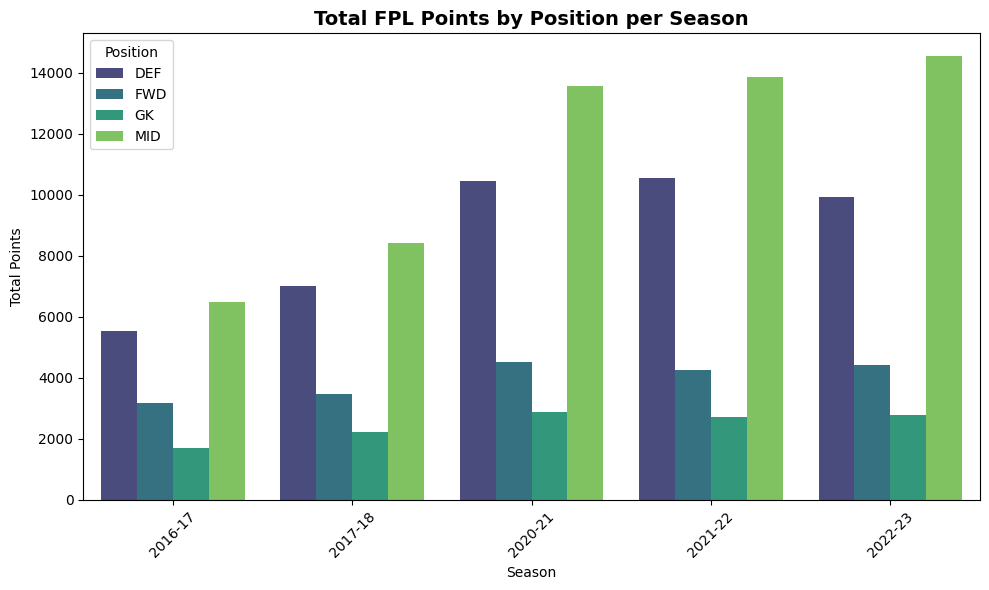

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style
# sns.set(style="whitegrid")

# Your DataFrame is called df_position_stats
# Example: df_position_stats = position_stats

plt.figure(figsize=(10, 6))

# Grouped barplot
sns.barplot(
    data=position_stats,
    x='season_x',
    y='total_points_sum',
    hue='position',
    palette='viridis'
)

plt.title('Total FPL Points by Position per Season', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Position', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Average total points per position across all seasons
avg_points_by_position = (
    position_stats
    .groupby('position')['total_points_sum']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='total_points_sum', ascending=False)
)

print(avg_points_by_position)


  position  total_points_sum
3      MID           11384.4
0      DEF            8705.2
1      FWD            3975.8
2       GK            2463.2


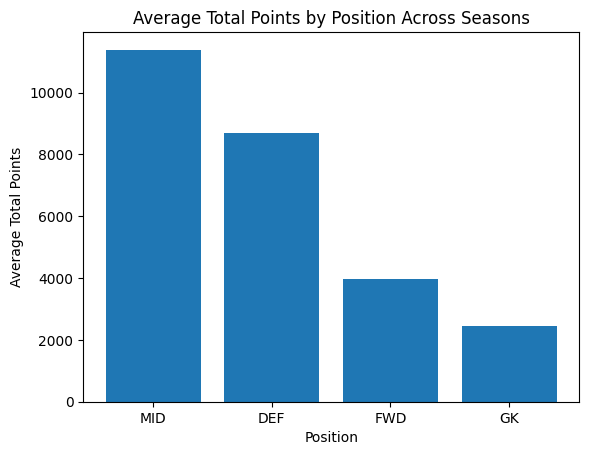

In [23]:
plt.bar(avg_points_by_position['position'], avg_points_by_position['total_points_sum'])
plt.title('Average Total Points by Position Across Seasons')
plt.xlabel('Position')
plt.ylabel('Average Total Points')
plt.show()

### Midfielders consistently have the highest total points across seasons.
### This suggests they contribute the most overall in FPL, on average.

## Question B: Top 5 Players Form Evolution During 2022-23 Season


In [24]:
# Question B: Top 5 Players Analysis for 2022-23 Season

# Filter data for 2022-23 season
df_2022_23 = df[df['season_x'] == '2022-23'].copy()

print(f"Total records for 2022-23 season: {len(df_2022_23)}")
print(f"Unique players in 2022-23: {df_2022_23['name'].nunique()}")
print(f"Gameweeks range: {df_2022_23['GW'].min()} - {df_2022_23['GW'].max()}")

# Check if we have form data
print(f"\nForm column statistics:")
print(df_2022_23['form'].describe())


Total records for 2022-23 season: 26505
Unique players in 2022-23: 777
Gameweeks range: 1 - 38

Form column statistics:
count    26505.000000
mean         0.120237
std          0.173599
min         -0.200000
25%          0.000000
50%          0.025000
75%          0.200000
max          1.500000
Name: form, dtype: float64


In [25]:
# Find top 5 players by total points in 2022-23
player_total_points = df_2022_23.groupby('name')['total_points'].sum().sort_values(ascending=False)
top_5_total_points = player_total_points.head(5)

print("Top 5 Players by Total Points (2022-23):")
for i, (player, points) in enumerate(top_5_total_points.items(), 1):
    print(f"{i}. {player}: {points} points")

# # Find top 5 players by average form in 2022-23
# player_avg_form = df_2022_23.groupby('name')['form'].mean().sort_values(ascending=False)
# top_5_form = player_avg_form.head(5)

# print("\nTop 5 Players by Average Form (2022-23):")
# for i, (player, form) in enumerate(top_5_form.items(), 1):
#     print(f"{i}. {player}: {form:.3f} form")


Top 5 Players by Total Points (2022-23):
1. Erling Haaland: 272 points
2. Harry Kane: 263 points
3. Mohamed Salah: 239 points
4. Martin Ødegaard: 212 points
5. Marcus Rashford: 205 points


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

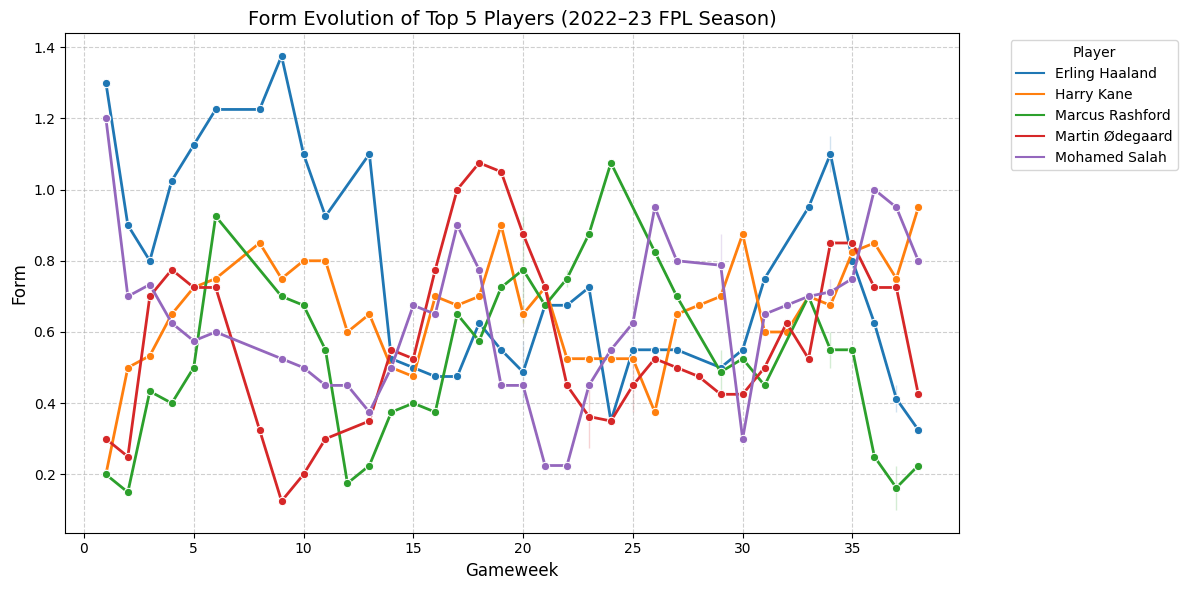

In [26]:
# Visualization for Question B - Form Evolution Analysis

# --- 1️⃣ Filter dataset for 2022–23 season only ---
df_2022_23 = df[df['season_x'] == '2022-23']

# --- 2️⃣ Get top 5 players by total points ---
top_5_players = top_5_total_points.index  # from your code

# --- 3️⃣ Filter only those players ---
top5_data = df_2022_23[df_2022_23['name'].isin(top_5_players)]

# --- 4️⃣ Sort by event (gameweek) for clean plotting ---
top5_data = top5_data.sort_values(by=['GW', 'name'])

# --- 5️⃣ Plot form evolution ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top5_data,
    x='GW', y='form',
    hue='name',
    marker='o',
    linewidth=2
)

# --- 6️⃣ Add labels and title ---
plt.title('Form Evolution of Top 5 Players (2022–23 FPL Season)', fontsize=14)
plt.xlabel('Gameweek', fontsize=12)
plt.ylabel('Form', fontsize=12)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
# Get top 5 form values across all seasons with player information
top_5_form_22_23_season = df[df['season_x'] == '2022-23'][['name', 'season_x', 'team_x', 'GW', 'form']].sort_values('form', ascending=False).head(5)

print("Top 5 Form Values Across 22/23 Season:")
print(top_5_form_22_23_season)

Top 5 Form Values Across 22/23 Season:
                      name season_x     team_x  GW   form
69667         Fabian Schär  2022-23  Newcastle   1  1.500
70081          Pascal Groß  2022-23   Brighton   1  1.500
73763       Erling Haaland  2022-23   Man City   9  1.375
70164     Dejan Kulusevski  2022-23      Spurs   1  1.300
69704  Aleksandar Mitrović  2022-23     Fulham   1  1.300


In [28]:
# Just the form values and player names
top_5_form_values = df[df['season_x'] == '2022-23'][['name', 'form']].sort_values('form', ascending=False).head(5)
print("Top 5 Form Values Across All Seasons:")
print(top_5_form_values)

Top 5 Form Values Across All Seasons:
                      name   form
69667         Fabian Schär  1.500
70081          Pascal Groß  1.500
73763       Erling Haaland  1.375
70164     Dejan Kulusevski  1.300
69704  Aleksandar Mitrović  1.300


In [29]:
df.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,form
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,32.0,1,0,0,0,55,True,0,1,0.100000
20277,2020-21,Aaron Connolly,FWD,Brighton,0,2,27,1,11.3,78,...,23.0,8,-1161,5332,6493,55,False,0,2,0.450000
20816,2020-21,Aaron Connolly,FWD,Brighton,0,0,2,0,12.1,78,...,8.0,2,13526,26823,13297,55,True,0,3,0.366667
21370,2020-21,Aaron Connolly,FWD,Brighton,0,0,7,0,0.3,78,...,4.0,2,-1311,10399,11710,55,False,0,4,0.325000
21932,2020-21,Aaron Connolly,FWD,Brighton,1,0,13,0,10.3,78,...,2.0,4,-8992,5860,14852,55,False,0,5,0.400000


## Summary and Conclusions


# Data Cleaning

In [30]:
df_filtered = df[[
    'season_x', 'name', 'position', 'team_x', 'GW', 'round',
    'minutes', 'goals_scored', 'assists', 'clean_sheets',
    'bonus', 'creativity', 'influence', 'threat', 'ict_index',
    'total_points', 'value', 'selected', 'was_home', 'opp_team_name'
]]

df_filtered = df_filtered.drop_duplicates()

# 🧩 3️⃣ Handle missing values (optional — depends on your analysis)
df_filtered = df_filtered.dropna(subset=['total_points', 'position', 'team_x'])

# 🧩 4️⃣ Reset index for clean display
df_filtered = df_filtered.reset_index(drop=True)

print("✅ Cleaned dataset shape:", df_filtered.shape)
print("✅ Columns kept:", df_filtered.columns.tolist())

✅ Cleaned dataset shape: (96169, 20)
✅ Columns kept: ['season_x', 'name', 'position', 'team_x', 'GW', 'round', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'bonus', 'creativity', 'influence', 'threat', 'ict_index', 'total_points', 'value', 'selected', 'was_home', 'opp_team_name']


In [31]:
df_filtered = df.copy()

In [32]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96169 entries, 19852 to 43705
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             96169 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            9616

### Encode Categorical Features

We'll use One-Hot Encoding for the `position` column since it's a nominal categorical variable with no ordinal relationship between categories (GK, DEF, MID, FWD).

In [33]:
# Check current position distribution
print("Position distribution:")
print(df_filtered['position'].value_counts())
print(f"\nUnique positions: {df_filtered['position'].unique()}")

Position distribution:
position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64

Unique positions: ['FWD' 'DEF' 'MID' 'GK']


In [34]:
# One-Hot Encode the position column
# Using drop_first=True to avoid multicollinearity (drops one category as reference)
# Convert to int (0/1) for ML model compatibility

position_encoded = pd.get_dummies(df_filtered['position'], prefix='position', drop_first=True, dtype=int)

print("One-Hot Encoded Position Columns:")
print(position_encoded.head(10))
print(f"\nNew columns created: {position_encoded.columns.tolist()}")
print(f"Shape: {position_encoded.shape}")
print(f"Data types: {position_encoded.dtypes.to_dict()}")

One-Hot Encoded Position Columns:
       position_FWD  position_GK  position_MID
19852             1            0             0
20277             1            0             0
20816             1            0             0
21370             1            0             0
21932             1            0             0
22519             1            0             0
23109             1            0             0
23706             1            0             0
24306             1            0             0
24907             1            0             0

New columns created: ['position_FWD', 'position_GK', 'position_MID']
Shape: (96169, 3)
Data types: {'position_FWD': dtype('int64'), 'position_GK': dtype('int64'), 'position_MID': dtype('int64')}


In [35]:
# Add encoded columns to the dataframe and drop original position column
df_encoded = df_filtered.copy()
df_encoded = pd.concat([df_encoded, position_encoded], axis=1)

# Drop the original 'position' column since it's now encoded
df_encoded = df_encoded.drop(columns=['position'])

print("✅ Dataset after One-Hot Encoding:")
print(f"Shape: {df_encoded.shape}")
print(f"\nFirst few rows with encoded positions:")
print(df_encoded[['name', 'team_x', 'GW', 'position_FWD', 'position_GK', 'position_MID', 'total_points']].head(10))

✅ Dataset after One-Hot Encoding:
Shape: (96169, 40)

First few rows with encoded positions:
                 name    team_x  GW  position_FWD  position_GK  position_MID  \
19852  Aaron Connolly  Brighton   1             1            0             0   
20277  Aaron Connolly  Brighton   2             1            0             0   
20816  Aaron Connolly  Brighton   3             1            0             0   
21370  Aaron Connolly  Brighton   4             1            0             0   
21932  Aaron Connolly  Brighton   5             1            0             0   
22519  Aaron Connolly  Brighton   6             1            0             0   
23109  Aaron Connolly  Brighton   7             1            0             0   
23706  Aaron Connolly  Brighton   8             1            0             0   
24306  Aaron Connolly  Brighton   9             1            0             0   
24907  Aaron Connolly  Brighton  10             1            0             0   

       total_points  
1985

## Predictive Modeling Task

### Create Target Variable: upcoming_total_points

For each player in each gameweek, we want to predict their points in the **next** gameweek. This requires shifting the `total_points` column by -1 within each player-season group.

In [36]:
# Create upcoming_total_points by shifting total_points by -1 within each player-season group
# Sort by player, season, and gameweek to ensure proper ordering

df_model = df_encoded.copy()
df_model = df_model.sort_values(by=['name', 'season_x', 'GW']).reset_index(drop=True)

# Shift total_points by -1 to get next week's points
df_model['upcoming_total_points'] = (
    df_model.groupby(['name', 'season_x'])['total_points'].shift(-1)
)

print("✅ Created upcoming_total_points column")
print(f"\nSample data showing current and upcoming points:")
print(df_model[['name', 'season_x', 'GW', 'total_points', 'upcoming_total_points']].head(15))
print(f"\nMissing values in upcoming_total_points: {df_model['upcoming_total_points'].isna().sum()}")

✅ Created upcoming_total_points column

Sample data showing current and upcoming points:
              name season_x  GW  total_points  upcoming_total_points
0   Aaron Connolly  2020-21   1             1                    8.0
1   Aaron Connolly  2020-21   2             8                    2.0
2   Aaron Connolly  2020-21   3             2                    2.0
3   Aaron Connolly  2020-21   4             2                    4.0
4   Aaron Connolly  2020-21   5             4                    0.0
5   Aaron Connolly  2020-21   6             0                    0.0
6   Aaron Connolly  2020-21   7             0                    1.0
7   Aaron Connolly  2020-21   8             1                    0.0
8   Aaron Connolly  2020-21   9             0                    2.0
9   Aaron Connolly  2020-21  10             2                    2.0
10  Aaron Connolly  2020-21  11             2                    1.0
11  Aaron Connolly  2020-21  12             1                    0.0
12  Aaron Conn

<Axes: >

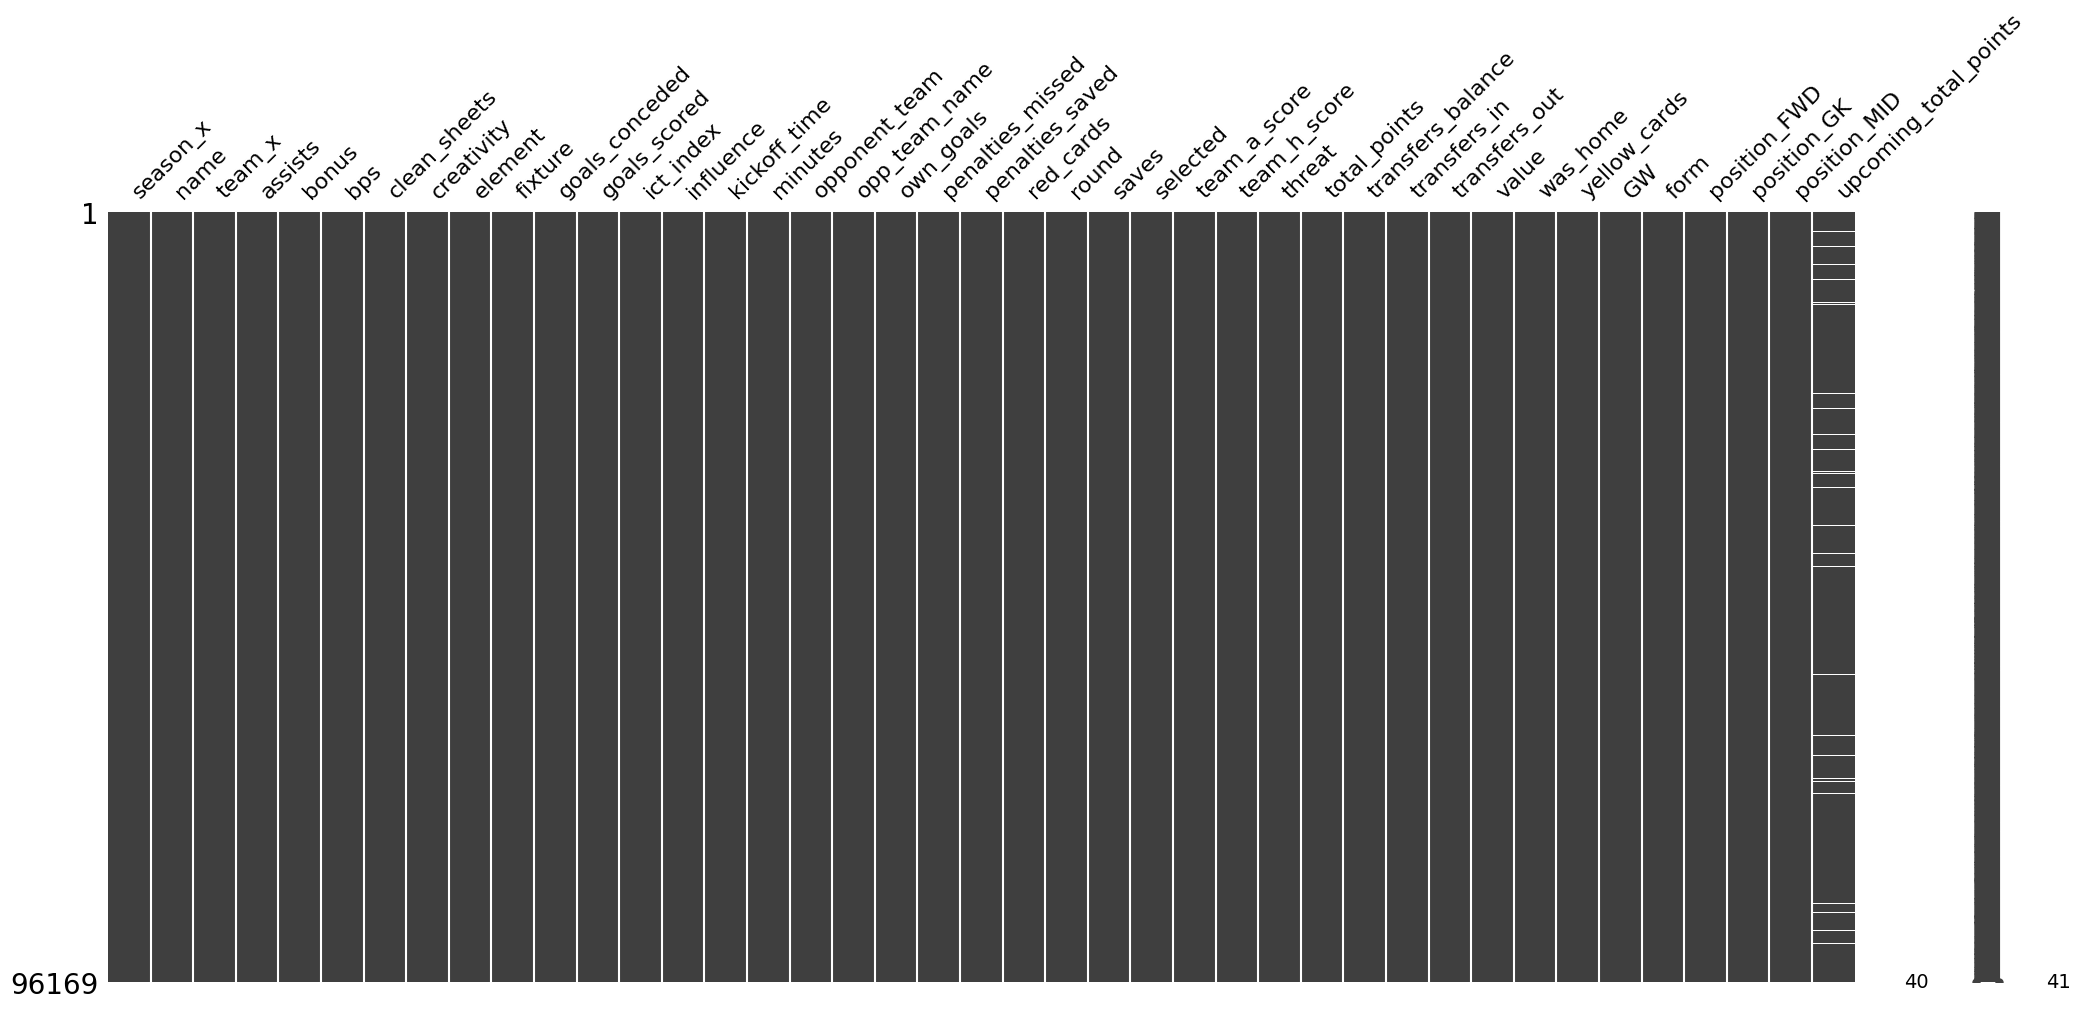

In [37]:
msno.matrix(df_model)

### Define Feature Sets

According to the task requirements:
- **Match-related features**: Events that happen in or around a game
- **Player-related features**: Characteristics describing the player's role or qualities

In [38]:
# Define feature sets based on task requirements

# Match-related features: Things that happen in or around a game
match_features = [
    'minutes',           # Minutes played
    'goals_scored',      # Goals scored in the match
    'assists',           # Assists provided
    'clean_sheets',      # Clean sheet bonus
    'goals_conceded',    # Goals conceded (for defenders/GK)
    'saves',             # Saves made (for GK)
    'bonus',             # Bonus points awarded
    'bps',               # Bonus points system score
    'yellow_cards',      # Yellow cards received
    'red_cards',         # Red cards received
    'own_goals',         # Own goals
    'penalties_missed',  # Penalties missed
    'penalties_saved',   # Penalties saved (for GK)
    'was_home',          # Home/away indicator
    'GW',                # Gameweek number (temporal context)
]

# Player-related features: Characteristics describing player's role or qualities
player_features = [
    'position_FWD',      # Position: Forward
    'position_GK',       # Position: Goalkeeper
    'position_MID',      # Position: Midfielder
    # position_DEF is implicit (all 3 position flags = 0)
    'ict_index',         # Combined ICT index
    'value',             # Player's value/cost
    'form',              # Player's recent form
    'goal_difference'
]

# Combine all features
all_features = match_features + player_features

print("📊 Feature Categories:")
print(f"\nMatch-related features ({len(match_features)}): {match_features}")
print(f"\nPlayer-related features ({len(player_features)}): {player_features}")
print(f"\nTotal features: {len(all_features)}")

📊 Feature Categories:

Match-related features (15): ['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'saves', 'bonus', 'bps', 'yellow_cards', 'red_cards', 'own_goals', 'penalties_missed', 'penalties_saved', 'was_home', 'GW']

Player-related features (7): ['position_FWD', 'position_GK', 'position_MID', 'ict_index', 'value', 'form', 'goal_difference']

Total features: 22


### Prepare Data for Modeling

Remove rows where `upcoming_total_points` is NaN (last gameweek of each player-season) and split into training/testing sets.

In [39]:
# Create a new feature: goal_difference
df_model['goal_difference'] = df_model.apply(
    lambda row: row['team_h_score'] - row['team_a_score'] if row['was_home'] else row['team_a_score'] - row['team_h_score'],
    axis=1
)

print(df_model[['name', 'GW', 'was_home', 'team_h_score', 'team_a_score', 'goal_difference']].head(10))


             name  GW  was_home  team_h_score  team_a_score  goal_difference
0  Aaron Connolly   1      True           1.0           3.0             -2.0
1  Aaron Connolly   2     False           0.0           3.0              3.0
2  Aaron Connolly   3      True           2.0           3.0             -1.0
3  Aaron Connolly   4     False           4.0           2.0             -2.0
4  Aaron Connolly   5     False           1.0           1.0              0.0
5  Aaron Connolly   6      True           1.0           1.0              0.0
6  Aaron Connolly   7     False           2.0           1.0             -1.0
7  Aaron Connolly   8      True           0.0           0.0              0.0
8  Aaron Connolly   9     False           1.0           2.0              1.0
9  Aaron Connolly  10      True           1.0           1.0              0.0


In [40]:
# Remove rows with missing upcoming_total_points (last gameweek of each player-season)
df_ml = df_model.dropna(subset=['upcoming_total_points']).copy()

# Convert was_home boolean to int if needed
if df_ml['was_home'].dtype == 'bool':
    df_ml['was_home'] = df_ml['was_home'].astype(int)

print(f"✅ Dataset prepared for modeling")
print(f"Original dataset: {len(df_model)} rows")
print(f"After removing NaN targets: {len(df_ml)} rows")
print(f"Rows dropped: {len(df_model) - len(df_ml)}")

# Verify all features exist
missing_features = [f for f in all_features if f not in df_ml.columns]
if missing_features:
    print(f"\n⚠️  Missing features: {missing_features}")
else:
    print(f"\n✅ All {len(all_features)} features are present")

# Check for any remaining NaN values in features
print(f"\nMissing values per feature:")
print(df_ml[all_features].isnull().sum()[df_ml[all_features].isnull().sum() > 0])

✅ Dataset prepared for modeling
Original dataset: 96169 rows
After removing NaN targets: 93387 rows
Rows dropped: 2782

✅ All 22 features are present

Missing values per feature:
Series([], dtype: int64)


In [41]:
# Analyze the NaN values in upcoming_total_points
# These should be the LAST gameweek for each player in each season

nan_rows = df_model[df_model['upcoming_total_points'].isna()]

print(f"Total NaN rows: {len(nan_rows)}")
print(f"\nBreakdown by gameweek:")
print(nan_rows['GW'].value_counts().sort_index())

print(f"\nSample of rows with NaN upcoming_total_points:")
print(nan_rows[['name', 'season_x', 'GW', 'total_points', 'upcoming_total_points']].head(20))

# Check if these are indeed the last gameweeks
print(f"\n🔍 Analysis: Are these the last gameweeks for each player-season?")
for idx in nan_rows.head(5).index:
    row = df_model.loc[idx]
    player_season = df_model[(df_model['name'] == row['name']) & (df_model['season_x'] == row['season_x'])]
    max_gw = player_season['GW'].max()
    print(f"{row['name']} in {row['season_x']}: GW {row['GW']} (max GW: {max_gw})")

Total NaN rows: 2782

Breakdown by gameweek:
GW
38    2782
Name: count, dtype: int64

Sample of rows with NaN upcoming_total_points:
                name season_x  GW  total_points  upcoming_total_points
37    Aaron Connolly  2020-21  38             1                    NaN
75    Aaron Connolly  2021-22  38             0                    NaN
113  Aaron Cresswell  2016-17  38             2                    NaN
151  Aaron Cresswell  2017-18  38             2                    NaN
189  Aaron Cresswell  2020-21  38             6                    NaN
227  Aaron Cresswell  2021-22  38             1                    NaN
265  Aaron Cresswell  2022-23  38             1                    NaN
303     Aaron Hickey  2022-23  38             6                    NaN
341     Aaron Lennon  2016-17  38             0                    NaN
379     Aaron Lennon  2017-18  38             2                    NaN
415     Aaron Lennon  2021-22  38             1                    NaN
453       Aaron

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [42]:
# Check if there are mid-season NaN values (players who stopped playing before GW 38)
# These would represent injuries, transfers, or players who left mid-season

nan_analysis = df_ml[df_ml['upcoming_total_points'].isna()].copy()

print("=" * 60)
print("ANALYSIS OF NaN VALUES IN upcoming_total_points")
print("=" * 60)

# Check if ALL NaN are at GW 38 (end of season)
print(f"\nTotal NaN values: {nan_analysis.shape[0]}")
print(f"\nGameweek distribution of NaN values:")
print(nan_analysis['GW'].value_counts().sort_index())

# Are there any mid-season NaN values (GW < 38)?
mid_season_nan = nan_analysis[nan_analysis['GW'] < 38]
print(f"\n🔍 Mid-season NaN values (GW < 38): {len(mid_season_nan)}")

if len(mid_season_nan) > 0:
    print("\n⚠️ WARNING: Found mid-season NaN values!")
    print("These represent players whose season ended early (injury, transfer, etc.)")
    print("\nSample of mid-season NaN cases:")
    print(mid_season_nan[['name', 'season_x', 'GW', 'team_x', 'total_points', 'upcoming_total_points']].head(10))
else:
    print("\n✅ All NaN values are at GW 38 (end of season)")
    print("These are expected boundary cases with no 'next week' to predict.")

ANALYSIS OF NaN VALUES IN upcoming_total_points

Total NaN values: 0

Gameweek distribution of NaN values:
Series([], Name: count, dtype: int64)

🔍 Mid-season NaN values (GW < 38): 0

✅ All NaN values are at GW 38 (end of season)
These are expected boundary cases with no 'next week' to predict.


In [43]:
# NOW let's properly analyze the NaN values in df_model (before dropping)
print("=" * 70)
print("DETAILED ANALYSIS OF NaN VALUES IN upcoming_total_points")
print("=" * 70)

nan_rows_full = df_model[df_model['upcoming_total_points'].isna()].copy()

print(f"\nTotal NaN values: {len(nan_rows_full)} out of {len(df_model)} rows ({len(nan_rows_full)/len(df_model)*100:.2f}%)")

print(f"\n📊 Gameweek distribution of NaN values:")
gw_dist = nan_rows_full['GW'].value_counts().sort_index()
print(gw_dist)

# Check for mid-season NaN (GW < 38)
mid_season_nan_full = nan_rows_full[nan_rows_full['GW'] < 38]
print(f"\n🔍 Mid-season NaN values (GW < 38): {len(mid_season_nan_full)}")

if len(mid_season_nan_full) > 0:
    print("\n⚠️ WARNING: Found mid-season NaN values!")
    print("These likely represent players whose season ended early due to:")
    print("  - Injury")
    print("  - Transfer to another league")
    print("  - End of loan spell")
    print("  - Retirement")
    
    print(f"\nSample of mid-season NaN cases:")
    sample = mid_season_nan_full[['name', 'season_x', 'GW', 'team_x', 'minutes', 'total_points']].head(20)
    print(sample)
    
    print(f"\n💡 Decision needed:")
    print(f"   - DROP: If we can't predict when a season ends early (recommended)")
    print(f"   - IMPUTE: Only if we want to predict 'end of availability' (complex)")
else:
    print("\n✅ ALL NaN values are at GW 38 (end of season)")
    print("These are expected boundary cases - no 'next week' exists.")
    print("Action: DROP these rows (already done in df_ml)")

DETAILED ANALYSIS OF NaN VALUES IN upcoming_total_points

Total NaN values: 2782 out of 96169 rows (2.89%)

📊 Gameweek distribution of NaN values:
GW
38    2782
Name: count, dtype: int64

🔍 Mid-season NaN values (GW < 38): 0

✅ ALL NaN values are at GW 38 (end of season)
These are expected boundary cases - no 'next week' exists.
Action: DROP these rows (already done in df_ml)


### ⚠️ Important: Why We Drop NaN values (Not Impute)

The NaN values in `upcoming_total_points` are **NOT missing data** - they are **structurally impossible values**.

**Analysis Results:**
- Total NaN values: **2,782 (2.89% of dataset)**
- **ALL 2,782 occur at Gameweek 38** (final gameweek of each season)
- **ZERO mid-season NaN values** (no injuries/transfers causing early season ends)

**Why These NaN Values Exist:**
- Each season ends at GW 38 - there is no GW 39
- For each player-season combination, their final gameweek cannot have an "upcoming" value
- This is a natural boundary condition in time-series forecasting

**Why NOT to Impute:**
- ❌ You can't impute what doesn't exist (there is no GW 39)
- ❌ Imputing would create fictional target values
- ❌ It would violate the prediction task logic

**Why We MUST Drop:**
- ✅ These rows have no valid target to predict
- ✅ Training on them would be meaningless
- ✅ This is the correct approach for time-series with boundary conditions
- ✅ No information loss since these are structural impossibilities, not missing data

**Note on Mid-Season Endings:**
If a player's season ended early (injury, transfer), they simply don't have rows for subsequent gameweeks in this dataset. They don't appear as NaN values - they're just absent from later GWs.

In [44]:
# Split data chronologically - use 2022-23 season as test set
# This mimics real-world scenario where we predict future based on past

train_df = df_ml[df_ml['season_x'] != '2022-23'].copy()
test_df = df_ml[df_ml['season_x'] == '2022-23'].copy()

# Prepare X and y for training and testing
X_train = train_df[all_features]
y_train = train_df['upcoming_total_points']

X_test = test_df[all_features]
y_test = test_df['upcoming_total_points']

print("📊 Train/Test Split:")
print(f"Training set: {len(X_train)} samples from seasons before 2022-23")
print(f"Test set: {len(X_test)} samples from 2022-23 season")
print(f"\nFeature matrix shape: {X_train.shape}")
print(f"Target variable shape: {y_train.shape}")
print(f"\nTarget statistics (training):")
print(y_train.describe())

📊 Train/Test Split:
Training set: 67659 samples from seasons before 2022-23
Test set: 25728 samples from 2022-23 season

Feature matrix shape: (67659, 22)
Target variable shape: (67659,)

Target statistics (training):
count    67659.000000
mean         1.449859
std          2.607302
min         -7.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         29.000000
Name: upcoming_total_points, dtype: float64


## Build Regression Models

We'll implement two approaches:
1. **Classic ML Models**: Linear Regression, Random Forest, XGBoost
2. **Neural Network**: Shallow Feed-Forward Neural Network (FFNN)

All models will be evaluated using: MAE, MSE, RMSE, and R²

In [45]:
# Install TensorFlow and XGBoost
%pip install tensorflow xgboost

Note: you may need to restart the kernel to use updated packages.


### ⚠️ After Installing Packages - Run These Cells

Since the kernel was restarted, please re-run these cells in order:
1. **Cell 2**: Import pandas, matplotlib, seaborn, missingno
2. **Cell 3**: Load the main dataset
3. **Cell 46**: Create df_filtered = df.copy()  
4. **Cell 48**: Drop popularity columns
5. **Cell 51**: One-hot encode positions
6. **Cell 52**: Create df_encoded
7. **Cell 55**: Create upcoming_total_points (df_model)
8. **Cell 60**: Prepare df_ml (drop NaN values)
9. **Cell 65**: Train/test split

Or use "Run All Above" on cell 70 to execute all preceding cells automatically.

In [46]:
# Import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# For Neural Network - TensorFlow/Keras
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models, regularizers, optimizers, callbacks
    print("✅ TensorFlow/Keras available")
    tf_available = True
except ImportError as e:
    print(f"⚠️  TensorFlow not installed: {e}")
    print("Will skip Neural Network.")
    tf_available = False
    
# Try XGBoost (optional)
try:
    import xgboost as xgb
    print("✅ XGBoost available")
    xgb_available = True
except ImportError:
    print("⚠️  XGBoost not installed. Will skip XGBoost model.")
    xgb_available = False

print("\n📦 Libraries imported successfully")

✅ TensorFlow/Keras available
✅ XGBoost available

📦 Libraries imported successfully


In [47]:
def plot_fitting_line(y_true, y_pred, model_name):

    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_true, y=y_pred, color='blue', alpha=0.6, label='Predictions')
    
    max_val = max(np.max(y_true), np.max(y_pred))
    min_val = min(np.min(y_true), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')
    
    sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', line_kws={'label': 'Fit Line'})
    
    plt.title(f"{model_name} — Actual vs Predicted", fontsize=14)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [48]:
def plot_fitting_and_print_metrics(y_test,y_pred, model_name):
    plot_fitting_line(y_test, y_pred, model_name)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.nanmean(np.abs((y_test - y_pred) / np.where(y_test == 0, np.nan, y_test))) * 100    
    print("✅ Model trained successfully!")
    print("📊 Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE):      {mae:.4f}")
    print(f"Mean Squared Error (MSE):       {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²):                 {r2:.4f}")

In [49]:
# Helper function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    """
    Calculate and display regression metrics
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # print(f"\n{'='*60}")
    print(f"📊 {model_name} - Evaluation Metrics")
    # print(f"{'='*60}")
    # print(f"Mean Absolute Error (MAE):       {mae:.4f}")
    # print(f"Mean Squared Error (MSE):        {mse:.4f}")
    # print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
    # print(f"R-squared (R²):                  {r2:.4f}")
    # print(f"{'='*60}")
    plot_fitting_and_print_metrics(y_true, y_pred, model_name)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

print("✅ Evaluation function defined")

✅ Evaluation function defined


### Approach 1: Classic Machine Learning Models

In [50]:
X_train.columns

Index(['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'saves', 'bonus', 'bps', 'yellow_cards', 'red_cards', 'own_goals',
       'penalties_missed', 'penalties_saved', 'was_home', 'GW', 'position_FWD',
       'position_GK', 'position_MID', 'ict_index', 'value', 'form',
       'goal_difference'],
      dtype='object')

🚀 Training Linear Regression...
📊 Linear Regression - Evaluation Metrics


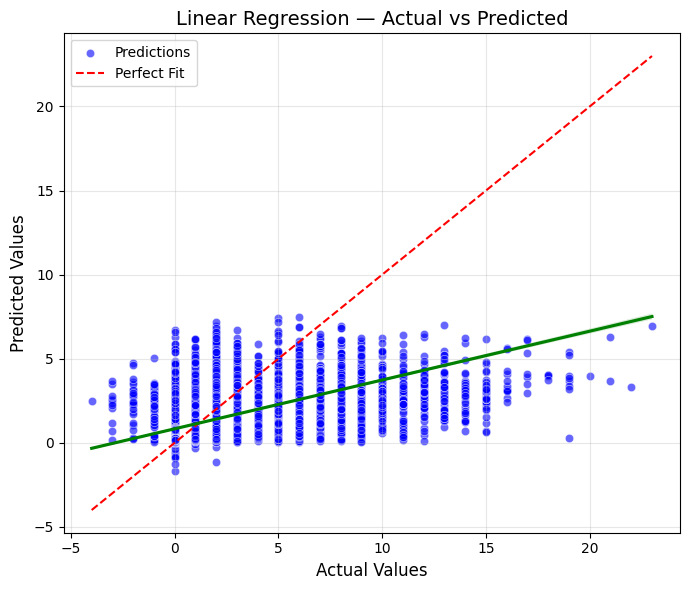

✅ Model trained successfully!
📊 Evaluation Metrics:
Mean Absolute Error (MAE):      1.0709
Mean Squared Error (MSE):       3.8963
Root Mean Squared Error (RMSE): 1.9739
Mean Absolute Percentage Error (MAPE): 73.06%
R-squared (R²):                 0.2998

💡 Interpretation:
   - On average, predictions are off by 1.07 points
   - Model explains 29.98% of variance in upcoming points


In [51]:
# Model 1: Linear Regression
print("🚀 Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

print(f"\n💡 Interpretation:")
print(f"   - On average, predictions are off by {lr_results['MAE']:.2f} points")
print(f"   - Model explains {lr_results['R2']*100:.2f}% of variance in upcoming points")

In [52]:
from sklearn.model_selection import train_test_split

# Use 'upcoming_total_points' as the target variable
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    df_ml[all_features], df_ml['upcoming_total_points'], test_size=0.2, random_state=42
)

🚀 Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


📊 Random Forest - Evaluation Metrics


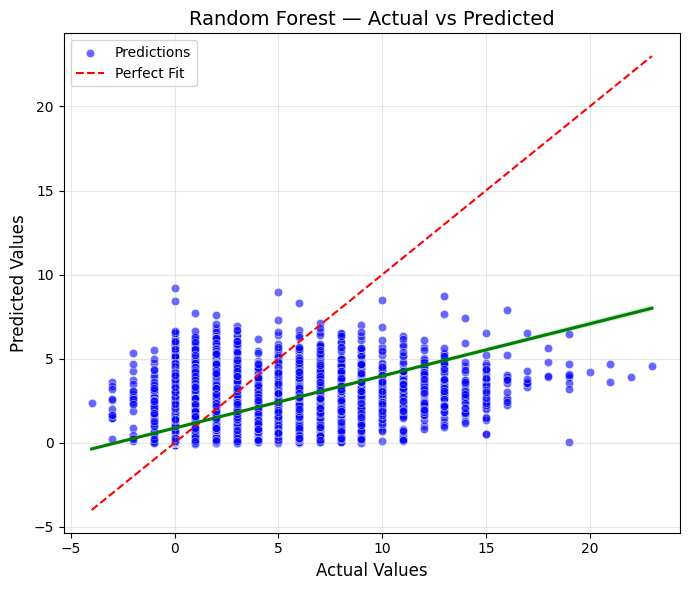

✅ Model trained successfully!
📊 Evaluation Metrics:
Mean Absolute Error (MAE):      1.0797
Mean Squared Error (MSE):       3.9844
Root Mean Squared Error (RMSE): 1.9961
Mean Absolute Percentage Error (MAPE): 78.10%
R-squared (R²):                 0.2839

💡 Interpretation:
   - On average, predictions are off by 1.08 points
   - Model explains 28.39% of variance in upcoming points


In [53]:
# Model 2: Random Forest Regressor
print("🚀 Training Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of trees
    min_samples_split=20,  # Minimum samples to split a node
    random_state=42,       # For reproducibility
    n_jobs=-1,             # Use all CPU cores
    verbose=1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

print(f"\n💡 Interpretation:")
print(f"   - On average, predictions are off by {rf_results['MAE']:.2f} points")
print(f"   - Model explains {rf_results['R2']*100:.2f}% of variance in upcoming points")

🚀 Training XGBoost...
📊 XGBoost - Evaluation Metrics


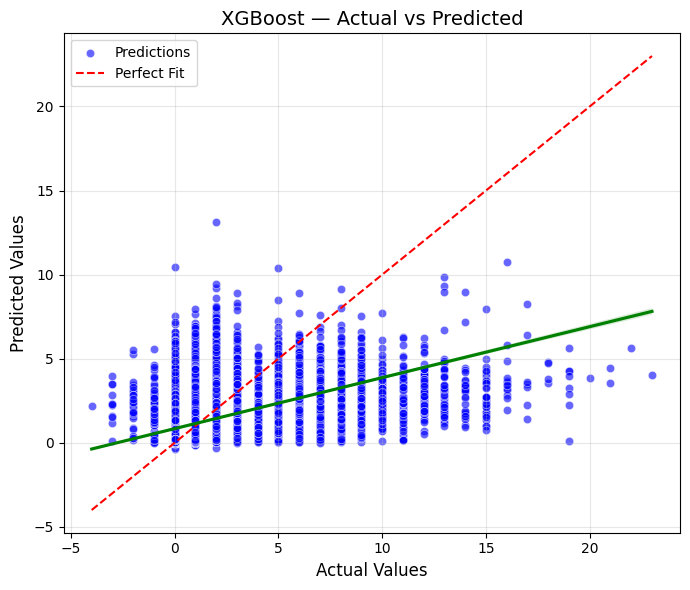

✅ Model trained successfully!
📊 Evaluation Metrics:
Mean Absolute Error (MAE):      1.0704
Mean Squared Error (MSE):       4.0718
Root Mean Squared Error (RMSE): 2.0179
Mean Absolute Percentage Error (MAPE): 76.68%
R-squared (R²):                 0.2682

💡 Interpretation:
   - On average, predictions are off by 1.07 points
   - Model explains 26.82% of variance in upcoming points


In [54]:
# Model 3: XGBoost (if available)
if xgb_available:
    print("🚀 Training XGBoost...")
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        verbosity=1
    )
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Evaluate
    xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")
    
    print(f"\n💡 Interpretation:")
    print(f"   - On average, predictions are off by {xgb_results['MAE']:.2f} points")
    print(f"   - Model explains {xgb_results['R2']*100:.2f}% of variance in upcoming points")
else:
    print("⚠️  Skipping XGBoost (not installed)")
    xgb_results = None

### Approach 2: Neural Network (Shallow FFNN)

In [55]:
# Normalize features for Neural Network (important for convergence)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features normalized (mean=0, std=1)")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

✅ Features normalized (mean=0, std=1)
Training set shape: (67659, 22)
Test set shape: (25728, 22)


In [56]:
# # Plot training history
# plt.figure(figsize=(14, 5))

# # Plot loss
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
# plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
# plt.title('Model Loss During Training', fontsize=14, fontweight='bold')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot MAE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
# plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
# plt.title('Model MAE During Training', fontsize=14, fontweight='bold')
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# print(f"\n📊 Training completed in {len(history.history['loss'])} epochs")

In [57]:
# Evaluate Neural Network on test set
# print("📊 Evaluating Neural Network on test set...")

# y_pred_nn = ffnn_model.predict(X_test_scaled, verbose=0).flatten()

# # Evaluate
# nn_results = evaluate_model(y_test, y_pred_nn, "Neural Network (FFNN)")

# print(f"\n💡 Interpretation:")
# print(f"   - On average, predictions are off by {nn_results['MAE']:.2f} points")
# print(f"   - Model explains {nn_results['R2']*100:.2f}% of variance in upcoming points")

### Model Comparison and Results

In [58]:
# Compare all models
# results_comparison = pd.DataFrame({
#     'Model': ['Linear Regression', 'Random Forest', 'XGBoost' if xgb_available else 'XGBoost (N/A)', 'Neural Network'],
#     'MAE': [lr_results['MAE'], rf_results['MAE'], xgb_results['MAE'] if xgb_results else np.nan, nn_results['MAE']],
#     'MSE': [lr_results['MSE'], rf_results['MSE'], xgb_results['MSE'] if xgb_results else np.nan, nn_results['MSE']],
#     'RMSE': [lr_results['RMSE'], rf_results['RMSE'], xgb_results['RMSE'] if xgb_results else np.nan, nn_results['RMSE']],
#     'R²': [lr_results['R2'], rf_results['R2'], xgb_results['R2'] if xgb_results else np.nan, nn_results['R2']]
# })

# # Drop XGBoost row if not available
# if not xgb_available or xgb_results is None:
#     results_comparison = results_comparison[results_comparison['Model'] != 'XGBoost (N/A)']

# print("\n" + "="*80)
# print("🏆 MODEL COMPARISON - ALL METRICS")
# print("="*80)
# print(results_comparison.to_string(index=False))
# print("="*80)

# # Find best model for each metric
# print("\n🥇 Best Models by Metric:")
# print(f"   Lowest MAE:   {results_comparison.loc[results_comparison['MAE'].idxmin(), 'Model']} ({results_comparison['MAE'].min():.4f})")
# print(f"   Lowest RMSE:  {results_comparison.loc[results_comparison['RMSE'].idxmin(), 'Model']} ({results_comparison['RMSE'].min():.4f})")
# print(f"   Highest R²:   {results_comparison.loc[results_comparison['R²'].idxmax(), 'Model']} ({results_comparison['R²'].max():.4f})")

### Approach 3: Seperated Neural Networks (Shallow FFNN)

In [59]:
train_df = df[df['season_x'] != '2022-23'].copy()
test_df = df[df['season_x'] == '2022-23'].copy()

In [60]:
train_df = train_df.sort_values(by=['name', 'season_x', 'GW']).reset_index(drop=True)

# Shift total_points by -1 to get next week's points
train_df['upcoming_total_points'] = (
    train_df.groupby(['name', 'season_x'])['total_points'].shift(-1)
)

In [61]:
test_df = test_df.sort_values(by=['name', 'season_x', 'GW']).reset_index(drop=True)

# Shift total_points by -1 to get next week's points
test_df['upcoming_total_points'] = (
    test_df.groupby(['name', 'season_x'])['total_points'].shift(-1)
)

In [62]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['position_encoded'] = encoder.fit_transform(train_df['position'])
test_df['position_encoded'] = encoder.fit_transform(test_df['position'])

In [63]:
df_GK = train_df[train_df['position'] == 'GK'].copy()
df_Player = train_df[train_df['position'] != 'GK'].copy()

# print(position_encoded)

# df_Player['position_encoded'] = position_encoded

df_baseline = train_df.copy()
# df_baseline['position_encoded'] = position_encoded

<Axes: >

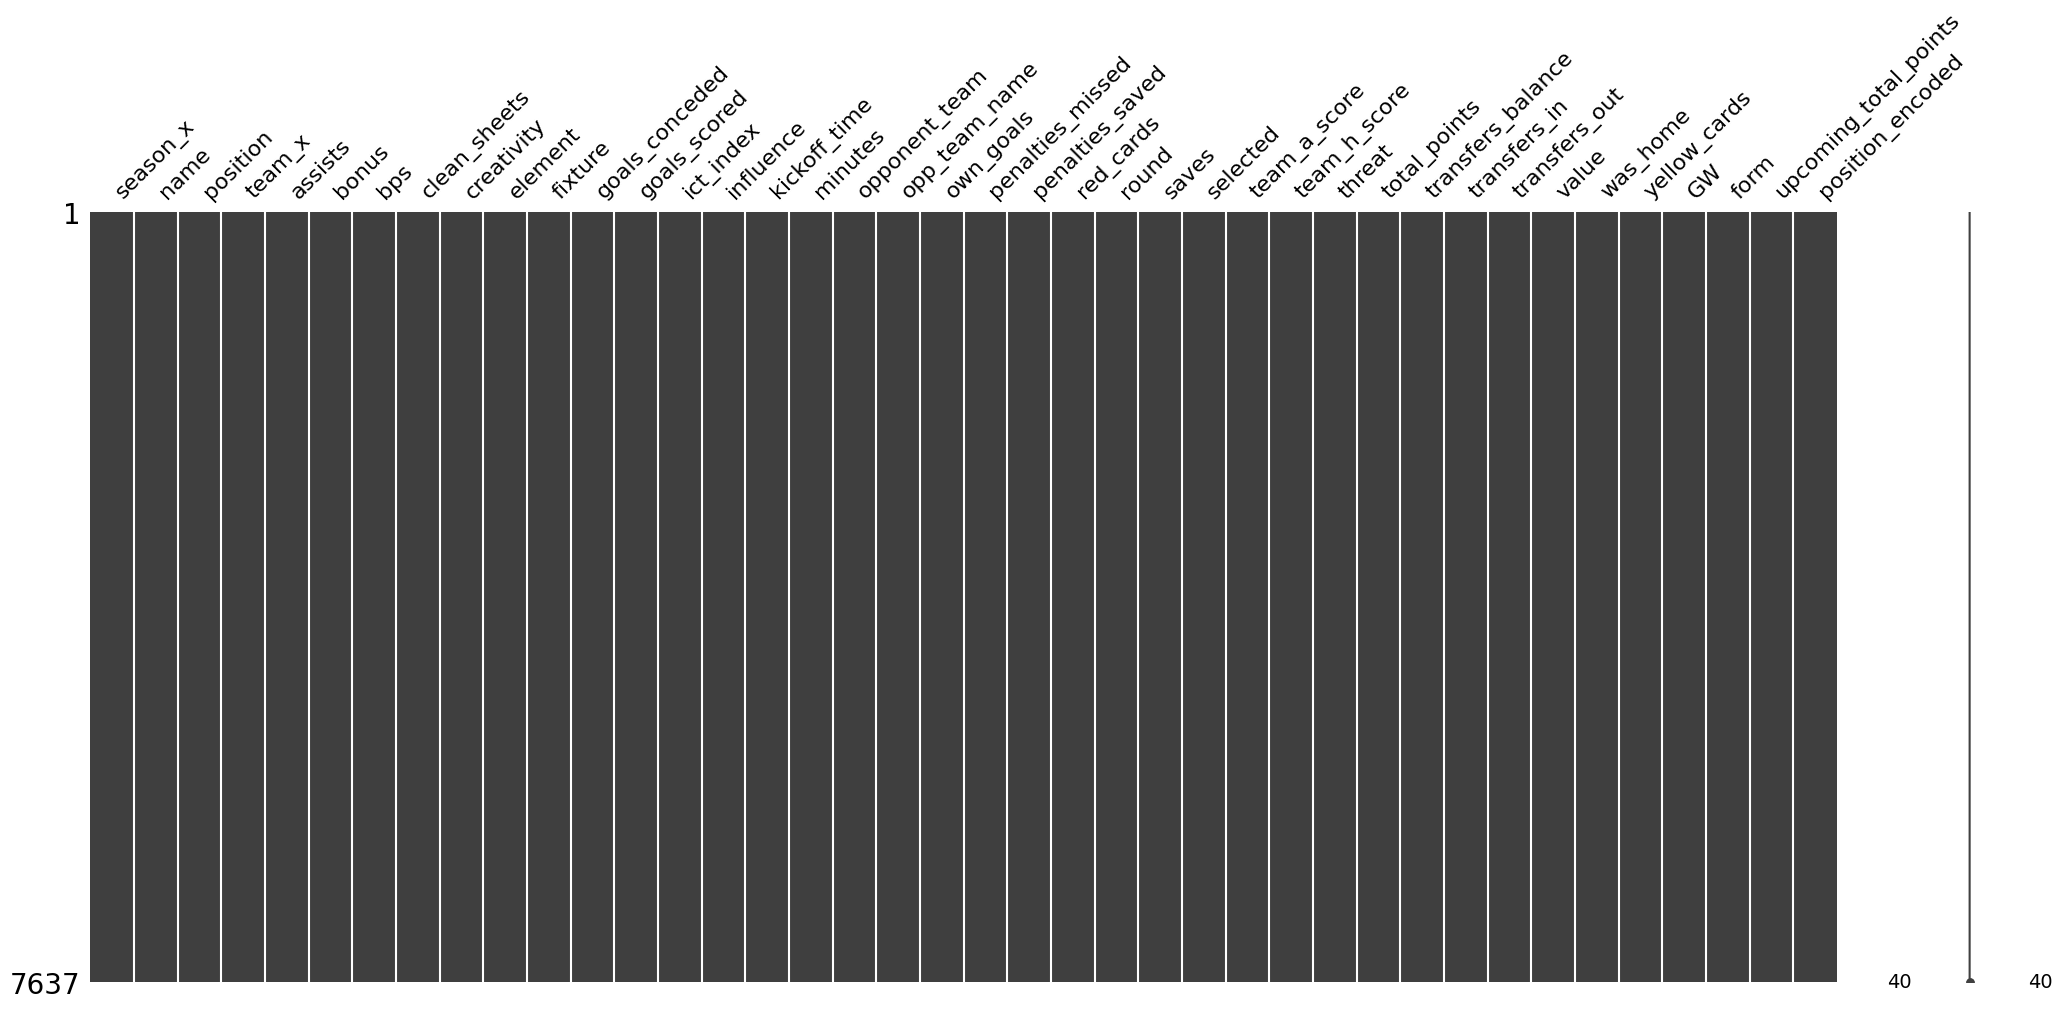

In [64]:
df_Player = df_Player.dropna(subset=["upcoming_total_points"]).reset_index(drop=True)
df_GK = df_GK.dropna(subset=["upcoming_total_points"]).reset_index(drop=True)
df_baseline = df_baseline.dropna(subset=["upcoming_total_points"]).reset_index(drop=True)
msno.matrix(df_GK)

In [65]:
# Feature and target 

# in case seperate models for players and goal keepers
X_Player = df_Player[['form', 'creativity', 'influence', 'threat', 'ict_index', 'goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals',"bps","bonus",'goals_conceded',"minutes", "value","position_encoded"]]
y_Player = df_Player['upcoming_total_points'] 

X_GK = df_GK[['form','goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals',"bps","bonus","goals_conceded", "minutes", "value", 'saves', 'penalties_saved']]
y_GK = df_GK['upcoming_total_points'] 

# for single model
X_overAll = df_baseline[['form', 'creativity', 'influence', 'threat', 'ict_index', 'goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals', "value","bps","bonus","goals_conceded", "minutes", 'saves', 'penalties_saved',"position_encoded"]]
y_overAll = df_baseline['upcoming_total_points'] 

**The following cell needs revision**

In [66]:
# Scale the features 
scaler = StandardScaler() 
X_Player_scaled = scaler.fit_transform(X_Player)

X_GK_scaled = scaler.fit_transform(X_GK)

X_overAll_scaled = scaler.fit_transform(X_overAll)

In [67]:
# Split the dataset into train and test sets: for player
X_Player_train, X_Player_test, y_Player_train, y_Player_test = train_test_split(X_Player_scaled, y_Player, 
test_size=0.2, random_state=42) 

In [68]:
# Split the dataset into train and test sets: for Goal keeper
X_GK_train, X_GK_test, y_GK_train, y_GK_test = train_test_split(X_GK_scaled, y_GK, 
test_size=0.2, random_state=42) 

In [69]:
# Split the dataset into train and test sets: for single model
X_overAll_train, X_overAll_test, y_overAll_train, y_overAll_test = train_test_split(X_overAll_scaled, y_overAll, 
test_size=0.2, random_state=42) 

In [70]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_Player_train.shape, "Train Label shape", y_Player_train.shape) 
print("Test data shape:",X_Player_test.shape, "Test Label shape", y_Player_test.shape) 

Train data shape: (48017, 18) Train Label shape (48017,)
Test data shape: (12005, 18) Test Label shape (12005,)


In [71]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_GK_train.shape, "Train Label shape", y_GK_train.shape) 
print("Test data shape:",X_GK_test.shape, "Test Label shape", y_GK_test.shape) 

Train data shape: (6109, 15) Train Label shape (6109,)
Test data shape: (1528, 15) Test Label shape (1528,)


In [72]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_overAll_train.shape, "Train Label shape", y_overAll_train.shape) 
print("Test data shape:",X_overAll_test.shape, "Test Label shape", y_overAll_test.shape) 

Train data shape: (54127, 20) Train Label shape (54127,)
Test data shape: (13532, 20) Test Label shape (13532,)


In [73]:
model_Player = Sequential([ 
Input(shape=(X_Player_train.shape[1],)),
layers.Dense(16, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'), 
layers.Dense(1, activation='linear')
]) 
model_Player.summary()

2025-10-21 23:03:21.175394: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,025 (11.82 KB)

 Trainable params: 3,025 (11.82 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model_GK = Sequential([ 
Input(shape=(X_GK_train.shape[1],)),
layers.Dense(18, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'),  
layers.Dense(1, activation='linear')  
]) 
model_GK.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 18)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model_overAll = Sequential([ 
Input(shape=(X_overAll_train.shape[1],)),
layers.Dense(18, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'),  
layers.Dense(1, activation='linear')  
]) 
model_overAll.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 18)             │           378 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,163 (12.36 KB)

 Trainable params: 3,163 (12.36 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model_Player.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [77]:
model_GK.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [78]:
model_overAll.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [79]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss',mode='min', patience=3, 
restore_best_weights=True) 
history_Player = model_Player.fit(X_Player_train, y_Player_train, 
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.7111 - mae: 1.3890 - mse: 5.7111 - val_loss: 5.3719 - val_mae: 1.3314 - val_mse: 5.3719
Epoch 2/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.1350 - mae: 1.3273 - mse: 5.1350 - val_loss: 5.3422 - val_mae: 1.4140 - val_mse: 5.3422
Epoch 3/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.9871 - mae: 1.3046 - mse: 4.9871 - val_loss: 5.3502 - val_mae: 1.4133 - val_mse: 5.3502
Epoch 4/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.0286 - mae: 1.2989 - mse: 5.0286 - val_loss: 5.3446 - val_mae: 1.3689 - val_mse: 5.3446
Epoch 5/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.1075 - mae: 1.3133 - mse: 5.1075 - val_loss: 5.3869 - val_mae: 1.4163 - val_mse: 5.3869


In [80]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_accuracy',mode='max', patience=3, 
restore_best_weights=True) 
history_GK = model_GK.fit(X_GK_train, y_GK_train, 
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.6926 - mae: 1.1253 - mse: 4.6926 - val_loss: 3.0279 - val_mae: 0.8653 - val_mse: 3.0279
Epoch 2/50
 74/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6532 - mae: 0.9565 - mse: 3.6532

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,mae,mse,val_loss,val_mae,val_mse
  current = self.get_monitor_value(logs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5462 - mae: 0.9458 - mse: 3.5462 - val_loss: 3.0148 - val_mae: 0.9206 - val_mse: 3.0148
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4921 - mae: 0.9747 - mse: 3.4921 - val_loss: 2.9913 - val_mae: 0.8324 - val_mse: 2.9913
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3031 - mae: 0.9214 - mse: 3.3031 - val_loss: 2.9789 - val_mae: 0.8583 - val_mse: 2.9789
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1753 - mae: 0.9405 - mse: 3.1753 - val_loss: 3.0030 - val_mae: 0.9103 - val_mse: 3.0030
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4322 - mae: 0.9921 - mse: 3.4322 - val_loss: 3.0163 - val_mae: 0.8820 - val_mse: 3.0163
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1387 - mae: 0.9291 - mse: 3.1387 - val_loss: 3.0031 - val_mae: 0.8332 - val_mse: 3.0031
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5266 - mae: 0.9425 - mse: 3.5266 - val_loss: 3.02

In [81]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_accuracy',mode='max', patience=3, 
restore_best_weights=True) 
history_overAll = model_overAll.fit(X_overAll_train, y_overAll_train, 
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.4485 - mae: 1.3248 - mse: 5.4485 - val_loss: 5.1735 - val_mae: 1.4112 - val_mse: 5.1735
Epoch 2/50
  77/1354 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4739 - mae: 1.1843 - mse: 4.4739

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,mae,mse,val_loss,val_mae,val_mse
  current = self.get_monitor_value(logs)


1354/1354 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.0242 - mae: 1.2789 - mse: 5.0242 - val_loss: 5.1438 - val_mae: 1.3164 - val_mse: 5.1438
Epoch 3/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.7525 - mae: 1.2616 - mse: 4.7525 - val_loss: 5.1334 - val_mae: 1.2463 - val_mse: 5.1334
Epoch 4/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.1566 - mae: 1.3040 - mse: 5.1566 - val_loss: 5.0834 - val_mae: 1.2734 - val_mse: 5.0834
Epoch 5/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.9886 - mae: 1.2817 - mse: 4.9886 - val_loss: 5.0819 - val_mae: 1.3124 - val_mse: 5.0819
Epoch 6/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.9579 - mae: 1.2797 - mse: 4.9579 - val_loss: 5.0819 - val_mae: 1.3672 - val_mse: 5.0819
Epoch 7/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.9658 - mae: 1.2793 - mse: 4.9658 - val_loss: 5.0656 - val_mae: 1.2810 - val_mse: 5.0656
Epoch 8/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.0320 - mae: 1.2937 - mse: 5.0320 - 

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_Player.predict(X_Player_test)
mae = mean_absolute_error(y_Player_test, y_pred)
mse = mean_squared_error(y_Player_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_Player_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_Player_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 1.42, MSE: 5.18, RMSE: 2.28, R²: 0.24
MAPE: 82.44%


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_GK.predict(X_GK_test)
mae = mean_absolute_error(y_GK_test, y_pred)
mse = mean_squared_error(y_GK_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_GK_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_GK_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.97, MSE: 3.24, RMSE: 1.80, R²: 0.45
MAPE: 84.80%


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_overAll.predict(X_overAll_test)
mae = mean_absolute_error(y_overAll_test, y_pred)
mse = mean_squared_error(y_overAll_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_overAll_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_overAll_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 1.30, MSE: 4.92, RMSE: 2.22, R²: 0.26
MAPE: 78.55%
